In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:

R_planet = 7*10**7
R_star = 7*10**8
angle = np.pi/2
P = 3*10**7 
a = 1*10**11
e = 0.2
ratio_of_mass  = 1/1000    #ratio of planet to stnar mass , data taken as ratio of jupiter to sun
angle_of_orbit = 50*np.pi/180 
M_planet = 2*10**27
M_star = 2*10**30

In [4]:
#first lets assume the orbit is circular and its a two body problem
# COM = M_planet*a/(M_planet + M_star) 
# COM is measured from stars center
COM = a/(1+(1/ratio_of_mass))
b   = a*np.cos(angle)


In [5]:

def area(x):                               #this is area on star covered by planet during start and end of transit
    alpha = np.arccos((R_planet-x)/R_planet)
    A = alpha*R_planet**2 - R_planet*np.sin(alpha)*(R_planet-x)
    return A

R_len = ((R_star)**2 - b**2)**0.5


P_rot_star = P*26/365                # data of sun  
omega_rot = 2*np.pi/P_rot_star
W_star = np.pi*(0.5+0.1)

In [6]:
    
def v_rot(alpha,theta):
    vel_rot = -omega_rot*R_star*np.cos(theta)*np.cos(alpha)
    return vel_rot

def vel_rad(t):
    W_star = np.pi*(0.5+0.1)                   #W_star is the angle between periastron and ascending node
    T = 0                                      #T is the last time star crosses periastron
    M_anomaly = 2*np.pi*(t-T)/P   
    V_com = 10                   #m/s
    
    K = ((6.67*10**-11)/(1-e**2))**0.5*M_planet*np.sin(angle)/((M_planet+M_star)*a)**0.5        #this is taken from a phd thesis
    
    E = ecc_anomaly(M_anomaly,e)
    v_star = true_anomaly(E,e)
    V = V_com + K*(np.cos(W_star + v_star) + e*np.cos(W_star ))
    return V
   
    
def ecc_anomaly(M,e):
    E_1 = M
    E_0 = 0
    while abs(E_1-E_0)>0.1:
        
        S = M + e*np.sin(E_1)
        E_0 = E_1
        E_1 = S
        
        #print(E_1-E_0)
      
    return E_1
    
    

def true_anomaly(E,e):
    
    v =np.arccos((np.cos(E)-e)/(1-e*np.cos(E)))
    if E >np.pi:
        v = 2*np.pi - v
    return v


def vel_tot(t,x,A):
   
    
    o = angle_of_orbit
    H = (R_len)*np.sin(o)-b*np.cos(o)
    h = (R_len-x+R_planet)*np.sin(o)-b*np.cos(o)
    
    #print(h/R_star)
    
    
    R_disc = (R_star**2 - h**2)**0.5
    y = R_star - (R_star**2 - H**2)**0.5 + (x-R_planet)*np.cos(o)     
    
    #calculating alpha and theta
    #here theta is latitude on star covered by planet and alpha is like the longitude (ranging from 0 to 180 as planet transits)
    
    if ((-y+R_star)/R_disc) < 1 and ((-y+R_star)/R_disc)>-1 :
        alpha = np.arccos((-y+R_star)/R_disc)
    elif x<2*R_planet:
        alpha = 0
    else:
        alpha = np.pi
     
    
    
    theta = np.arcsin(h/R_star)

    v_radial = vel_rad(t)
    v_rotation = v_rot(alpha,theta)
    
    v_tot = v_radial + v_rotation
    
    vel_covered = A*v_tot/(np.pi*R_star**2)
    vel_final = v_radial - vel_covered
    
    return vel_final
    
    

    
    
def velocity(x):               #this is velocity of planet while transiting the star
    orb_v = 2*np.pi*a*np.sin(angle)/P
    vel_circle = orb_v
    velocity  = ((1 + e*np.sin(W_star +np.pi))/(1-e**2)**0.5)*vel_circle  #this formula is taken from phd thesis
    
    return velocity

In [7]:
time = np.arange(0,P,P/50000)
vel1 =[]
s=0
x=0
for i in range(0,len(time),1):
    M = 2*np.pi*(time[i])/P 
    E_A = ecc_anomaly(M,e)
    T_A = true_anomaly(E_A,e)
    
  
    
    if T_A > np.pi/2 + W_star and x < 2*R_len +R_planet:
        t = i
        v = velocity(x)
       
        
        x = x + v*(time[i]-time[i-1])
        if x<2*R_planet:
            A =area(x)
            vel1.append(vel_tot(time[i],x,A))
            
        elif  x>= 2*R_planet and x<2*R_len :
            #print(x/(2*R_len +R_planet))
            A = np.pi*R_planet**2
            vel1.append(vel_tot(time[i],x,A))
            
        elif x>=2*R_len and x<2*R_len + 2*R_planet:
            A = area(2*R_len + 2*R_planet - x)
            vel1.append(vel_tot(time[i],x,A))    
            
        else:
            vel1.append(vel_rad(time[i]))
       
        
    else:
        vel1.append(vel_rad(time[i]))
        s=s+1
    

Text(0.5, 1.0, 'this plot is zoomed at transit')

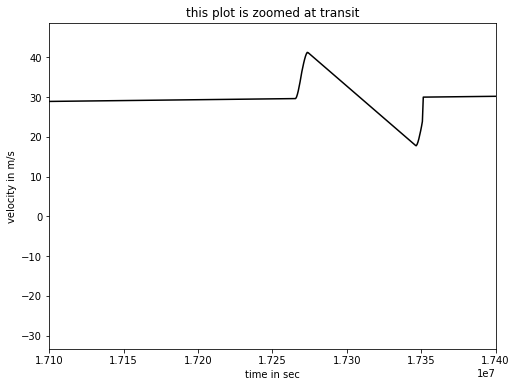

In [14]:
plt.figure(figsize=(8,6))
plt.plot(time,vel1,'k')
plt.xlim(28500/50000*P,29000/50000*P)
plt.ylabel('velocity in m/s')
plt.xlabel('time in sec')
plt.title('this plot is zoomed at transit')

Text(0.5, 1.0, 'this plot is for 1 year')

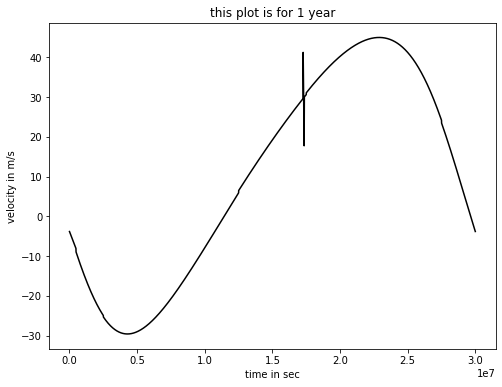

In [10]:
plt.figure(figsize=(8,6))
plt.plot(time1,vel2,'k')
plt.ylabel('velocity in m/s')
plt.xlabel('time in sec')
plt.title('this plot is for 1 year')